c:\Users\Admin\Desktop\Year 2\Semester Two\Actual Machine learning\machines\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Admin\Desktop\Year 2\Semester Two\Actual Machine learning\machines\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Admin\Desktop\Year 2\Semester Two\Actual Machine learning\machines\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



Teacher Model Accuracy: 0.9547631414460652

Teacher Model Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82     19067
           1       0.93      0.99      0.96     18766
           2       1.00      1.00      1.00     18731
           3       1.00      1.00      1.00     19153
           4       0.96      0.90      0.93     18949
           5       0.97      0.97      0.97     18772
           6       1.00      1.00      1.00     18916
           7       1.00      1.00      1.00     18831
           8       0.99      0.93      0.96     19048
           9       1.00      1.00      1.00     19044
          10       0.86      0.92      0.89     18907
          11       0.93      0.93      0.93     18998

    accuracy                           0.95    227182
   macro avg       0.96      0.95      0.95    227182
weighted avg       0.96      0.95      0.95    227182



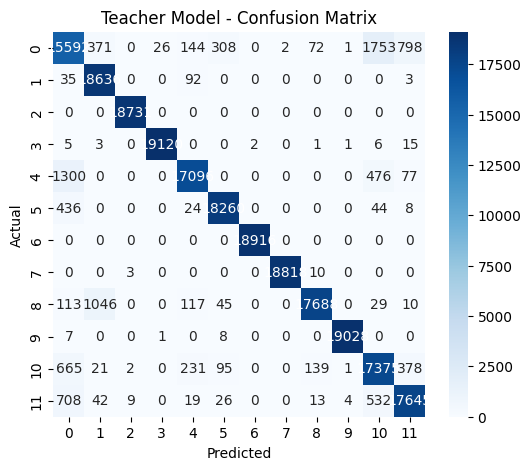


Student Decision Tree Accuracy: 0.5651283992569834


c:\Users\Admin\Desktop\Year 2\Semester Two\Actual Machine learning\machines\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\Desktop\Year 2\Semester Two\Actual Machine learning\machines\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\Desktop\Year 2\Semester Two\Actual Machine learning\machines\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi


Student Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.05      0.09     19067
           1       0.80      0.01      0.03     18766
           2       0.00      0.00      0.00     18731
           3       0.96      0.99      0.97     19153
           4       0.66      0.02      0.04     18949
           5       0.90      0.86      0.88     18772
           6       0.34      0.94      0.50     18916
           7       1.00      0.99      0.99     18831
           8       0.99      0.93      0.96     19048
           9       1.00      0.99      1.00     19044
          10       0.24      0.98      0.38     18907
          11       0.71      0.01      0.01     18998

    accuracy                           0.57    227182
   macro avg       0.67      0.56      0.49    227182
weighted avg       0.67      0.57      0.49    227182



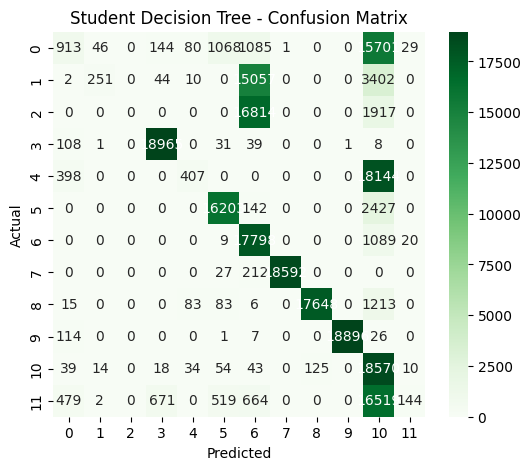

Epoch [0/50], Loss: 2.3135
Epoch [10/50], Loss: 2.1063
Epoch [20/50], Loss: 1.9224
Epoch [30/50], Loss: 1.7121
Epoch [40/50], Loss: 1.4691


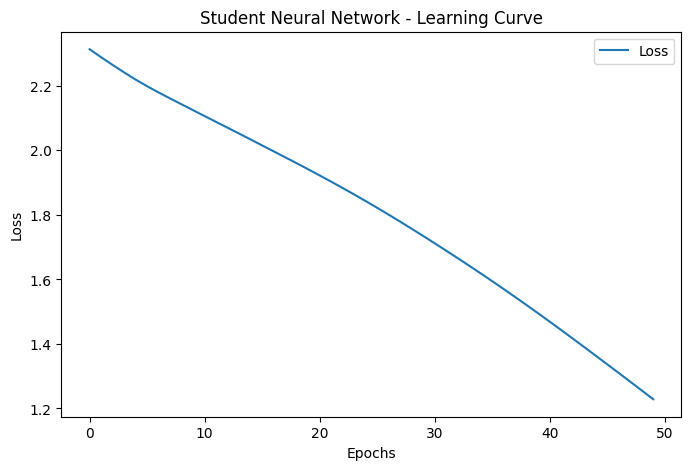


Student NN Model Accuracy: 0.7300402320606386

Student NN Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.47      0.39     19067
           1       0.83      0.98      0.90     18766
           2       1.00      0.98      0.99     18731
           3       0.97      0.99      0.98     19153
           4       0.46      0.78      0.58     18949
           5       0.95      0.88      0.92     18772
           6       1.00      0.62      0.77     18916
           7       0.91      0.99      0.95     18831
           8       0.50      0.94      0.65     19048
           9       1.00      0.94      0.97     19044
          10       0.00      0.00      0.00     18907
          11       0.87      0.19      0.31     18998

    accuracy                           0.73    227182
   macro avg       0.73      0.73      0.70    227182
weighted avg       0.73      0.73      0.70    227182



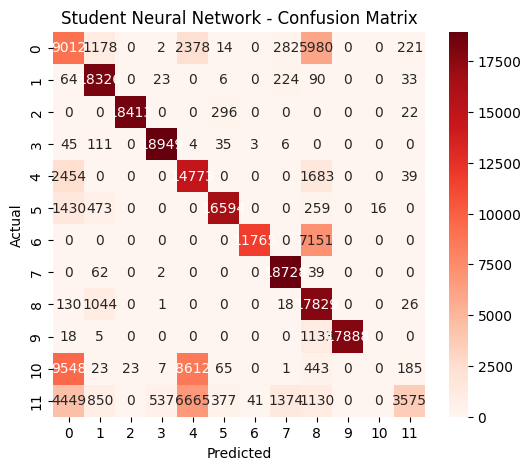

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Load and preprocess the dataset
df = pd.read_csv("RT_IOT2022.csv")
df = df.drop(columns=["Unnamed: 0"], errors='ignore')

# Encode categorical features
le = LabelEncoder()
df["proto"] = le.fit_transform(df["proto"])
df["service"] = le.fit_transform(df["service"])
df["Attack_type"] = le.fit_transform(df["Attack_type"])  # Target column

# Separate features and target variable
X = df.drop(columns=["Attack_type"])
y = df["Attack_type"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_pca, y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train the Teacher Model (Logistic Regression)
teacher_model = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs', random_state=42)

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(teacher_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_teacher = grid_search.best_estimator_

# Get soft probabilities from teacher model
y_train_soft = best_teacher.predict_proba(X_train)
y_test_soft = best_teacher.predict_proba(X_test)

# Evaluate Teacher Model
y_pred_teacher = best_teacher.predict(X_test)
print("\nTeacher Model Accuracy:", accuracy_score(y_test, y_pred_teacher))
print("\nTeacher Model Classification Report:\n", classification_report(y_test, y_pred_teacher))

# Confusion Matrix for Teacher Model
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_teacher), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Teacher Model - Confusion Matrix")
plt.show()

# Train the Student Model (Simpler Decision Tree)
student_model = DecisionTreeClassifier(max_depth=5, random_state=42)
student_model.fit(X_train, np.argmax(y_train_soft, axis=1))

# Evaluate Student Decision Tree Model
y_pred_student = student_model.predict(X_test)
print("\nStudent Decision Tree Accuracy:", accuracy_score(y_test, y_pred_student))
print("\nStudent Decision Tree Classification Report:\n", classification_report(y_test, y_pred_student))

# Confusion Matrix for Student Decision Tree
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_student), annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Student Decision Tree - Confusion Matrix")
plt.show()

# Define Student Neural Network
class StudentNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(StudentNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)  # No softmax applied (handled in loss function)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_soft_tensor = torch.tensor(y_train_soft, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Initialize student neural network
student_nn = StudentNN(input_size=X_train.shape[1], num_classes=y_train_soft.shape[1])
optimizer = optim.Adam(student_nn.parameters(), lr=0.001)
criterion = nn.KLDivLoss(reduction="batchmean")

# Training loop with loss tracking
epochs = 50
loss_values = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = student_nn(X_train_tensor)
    loss = criterion(F.log_softmax(outputs, dim=1), y_train_soft_tensor)  # KL divergence loss
    loss.backward()
    optimizer.step()
    
    loss_values.append(loss.item())  # Store loss for plotting
    
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

# Plot Learning Curve (Loss vs. Epochs)
plt.figure(figsize=(8,5))
plt.plot(range(epochs), loss_values, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Student Neural Network - Learning Curve")
plt.legend()
plt.show()

# Evaluate Student Neural Network Model
student_nn.eval()
with torch.no_grad():
    outputs = student_nn(X_test_tensor)
    y_pred_nn = torch.argmax(outputs, dim=1).numpy()

print("\nStudent NN Model Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\nStudent NN Classification Report:\n", classification_report(y_test, y_pred_nn))

# Confusion Matrix for Student Neural Network
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Student Neural Network - Confusion Matrix")
plt.show()
